In [5]:
import numpy as np

In [6]:
from skyfield.sgp4lib import EarthSatellite

line1 = "1 44369U 19037E   19336.85128827  .00002948  00000-0  80338-4 0  9998"
line2 = "2 44369  45.0161 138.5612 0013131 104.2716 255.9637 15.40122637 24094"

acrux1 = EarthSatellite(line1, line2, name="ACRUX1")

In [7]:
from skyfield.api import load

planets = load('de430t.bsp')
ts = load.timescale()
sun = planets['sun']

In [8]:
packetdata = np.genfromtxt("observation.csv", dtype=float, delimiter=',', names=True) 

In [9]:
from skyfield.api import utc

def numpytime_to_skyfieldtime(t):
    return ts.utc(t.item().year, t.item().month, t.item().day, t.item().hour, t.item().minute, t.item().second)

In [10]:
power_Xpos = packetdata["Xposv"] * packetdata["Xposi"]
power_Xneg = packetdata["Xnegv"] * packetdata["Xnegi"]
power_Ypos = packetdata["Yposv"] * packetdata["Yposi"]
power_Yneg = packetdata["Ynegv"] * packetdata["Ynegi"]
power_Zneg = packetdata["Znegv"] * packetdata["Znegi"]

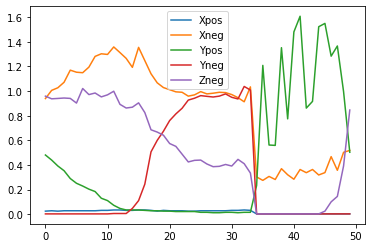

In [11]:
import matplotlib.pyplot as plt
plt.plot(power_Xpos)
plt.plot(power_Xneg)
plt.plot(power_Ypos)
plt.plot(power_Yneg)
plt.plot(power_Zneg)
plt.legend(["Xpos", "Xneg", "Ypos", "Yneg", "Zneg"])
None

In [12]:
power_all = np.zeros((5, power_Xpos.shape[0]))
power_all[0,:] = power_Xpos
power_all[1,:] = power_Xneg
power_all[2,:] = power_Ypos
power_all[3,:] = power_Yneg
power_all[4,:] = power_Zneg

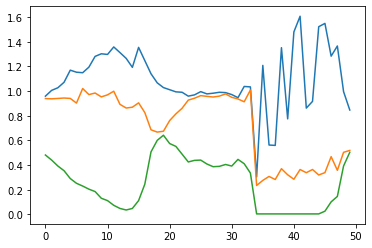

In [13]:
plt.plot(np.sort(power_all, axis=0)[-1,:])
plt.plot(np.sort(power_all, axis=0)[-2,:])
plt.plot(np.sort(power_all, axis=0)[-3,:])
None

In [14]:
total_power = np.sqrt(power_Xneg**2 + power_Zneg**2 + power_Ypos**2)

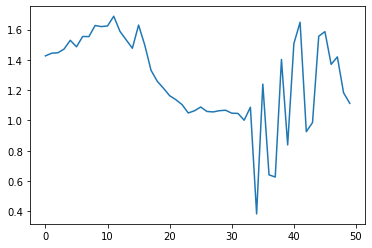

In [15]:
plt.plot(total_power)
None

In [16]:
cosXneg = power_Xneg / total_power
cosYpos = power_Ypos / total_power
cosZneg = power_Zneg / total_power

In [17]:
a = np.arccos(cosXneg)
b = np.arccos(cosYpos)
c = np.arccos(cosZneg)

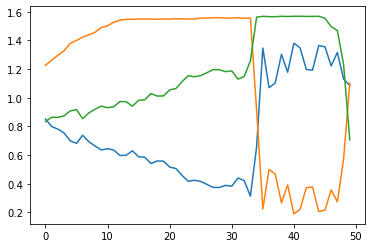

In [18]:
plt.plot(a)
plt.plot(b)
plt.plot(c)
None

In [19]:
t = packetdata["UnixTimestamp"].astype("datetime64[s]")[0]
t = numpytime_to_skyfieldtime(t)
acrux1.at(t)
sun.at(t)

<Barycentric BCRS position and velocity at date t center=0 target=10>

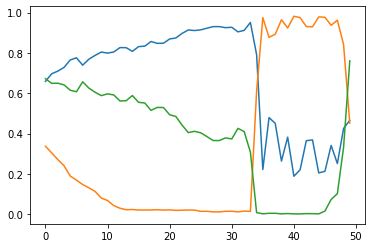

In [20]:
plt.plot(cosXneg)
plt.plot(cosYpos)
plt.plot(cosZneg)

In [34]:
from vpython import *
import numpy as np
c = canvas()
b = box()
x = np.diff(cosXneg)
y = np.diff(cosYpos)
z = np.diff(cosZneg)

for i in range(30):
    rate(10)
    b.rotate(x[i], axis=vector(1,0,0))
    b.rotate(y[i], axis=vector(0,1,0))
    b.rotate(z[i], axis=vector(0,0,1))

<IPython.core.display.Javascript object>